# NX31 Examproject

## Packages and extensions 

In [1]:
# Loads packages and extentions
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Enables sympy to write functions as math
sm.init_printing(use_unicode=True)

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [53]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [54]:
h_vec = np.linspace(0.1,1.5,100) 
h_vec

array([0.1       , 0.11414141, 0.12828283, 0.14242424, 0.15656566,
       0.17070707, 0.18484848, 0.1989899 , 0.21313131, 0.22727273,
       0.24141414, 0.25555556, 0.26969697, 0.28383838, 0.2979798 ,
       0.31212121, 0.32626263, 0.34040404, 0.35454545, 0.36868687,
       0.38282828, 0.3969697 , 0.41111111, 0.42525253, 0.43939394,
       0.45353535, 0.46767677, 0.48181818, 0.4959596 , 0.51010101,
       0.52424242, 0.53838384, 0.55252525, 0.56666667, 0.58080808,
       0.59494949, 0.60909091, 0.62323232, 0.63737374, 0.65151515,
       0.66565657, 0.67979798, 0.69393939, 0.70808081, 0.72222222,
       0.73636364, 0.75050505, 0.76464646, 0.77878788, 0.79292929,
       0.80707071, 0.82121212, 0.83535354, 0.84949495, 0.86363636,
       0.87777778, 0.89191919, 0.90606061, 0.92020202, 0.93434343,
       0.94848485, 0.96262626, 0.97676768, 0.99090909, 1.00505051,
       1.01919192, 1.03333333, 1.04747475, 1.06161616, 1.07575758,
       1.08989899, 1.1040404 , 1.11818182, 1.13232323, 1.14646

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Answer 1.1:**
We start by defining the utility function for period 2, given the contraints. We also notice, that given H between 0.1 and 1.5 and with L only being 1 or 0, we will always have negative utility in period 2. 

In [55]:
solve_h = (((-1+gamma*1)*(1-rho))**(1/(1-rho)))/w*1
print(solve_h)
print(v_2(0.55555555555555,1))

0.5555555555555556
-1.0000000000000089


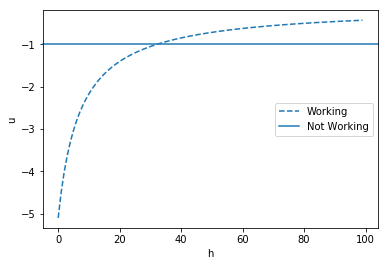

In [56]:
plt.plot(v_2(h_vec,1), '--')
plt.axhline(y = -1, xmin =0, xmax =1, clip_on = False)
plt.xlabel('h')
plt.ylabel('u')
plt.legend(('Working', 'Not Working'), loc='center right')

From the ilustration above, we see the 2 graphs. The dotted line shows us that utility of working is incereasing with human capital. The 'Not Working' graph, shows us a constant utilily of 1, which makes sense, as the utility simply comes from the benefits payment.
We can conclude that, if you have human capital over 0.5555, then you will choose to work, as this gives a strictly better utility. Whereas if you have a lower human capital you will choose to get the benefit payment as this is strictly better. Thus our turning point between choosing to work, is 0.5555.

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Answer 1.2:**
Now that we have period 2, we can solve period 1. We start by defining the utility for period 1.

In [57]:
def v_1(h_1,l_1,v2):
    if l_1 == 0:
        return ((b)**(1-rho))/(1-rho)-gamma*l_1 + beta*v2
    elif l_1 == 1:
        return ((w*h_1*l_1)**(1-rho))/(1-rho)-gamma*l_1 + beta*v2

In [58]:
solve_h_1 = (((-1+gamma*1)*(1-rho))**(1/(1-rho)))/w*1
print(solve_h)

0.5555555555555556


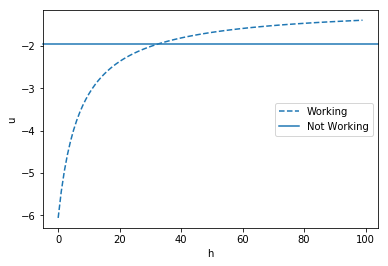

In [59]:
plt.plot(v_1(h_vec,1,-1), '--')
plt.axhline(y = -1.96, xmin =0, xmax =1, clip_on = False)
plt.xlabel('h')
plt.ylabel('u')
plt.legend(('Working', 'Not Working'), loc='center right')

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

If the income from working falls below the benefit, there are still some situations where the worker will work. If the worker has a very high human capital, then she will still choose to work

In [60]:
w_new = 0.99
def v_1(h_1,l_1,v2):
    if l_1 == 0:
        return ((b)**(1-rho))/(1-rho)-gamma*l_1 + beta*v2
    elif l_1 == 1:
        return ((w_new*h_1*l_1)**(1-rho))/(1-rho)-gamma*l_1 + beta*v2

In [61]:
solve_h_1 = (((-1+gamma*1)*(1-rho))**(1/(1-rho)))/w_new*1
print(solve_h)

0.5555555555555556


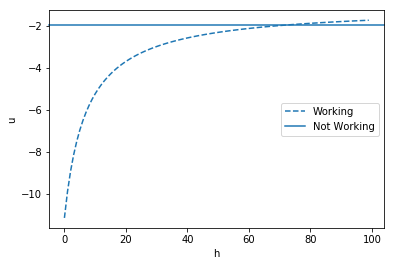

In [63]:
plt.plot(v_1(h_vec,1,-1), '--')
plt.axhline(y = -1.96, xmin =0, xmax =1, clip_on = False)
plt.xlabel('h')
plt.ylabel('u')
plt.legend(('Working', 'Not Working'), loc='center right')

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [12]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\phi$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.



**Answer 2.1:**  

We start by defining the functions up the functions.

In [13]:
# Defines variables for sympy math symbols
# Variables
y_t = sm.symbols('y_t')
r_t = sm.symbols('r_t')
v_t = sm.symbols('v_t')
pi_t = sm.symbols('pi_t')
i_t = sm.symbols('i_t')
pie_t = sm.symbols('pi_t^e')
s_t = sm.symbols('s_t')
pie_plus = sm.symbols('pi_t+1^e')
pi_minus = sm.symbols('pi_t-1')
y_minus = sm.symbols('y_t-1')
s_minus = sm.symbols('s_t-1')

# Parameters
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')

AD_curve:


SRAS_curve


AD=SRAS


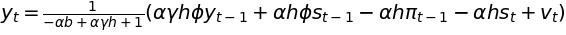

In [40]:
# a: defining AD and SRAS
print(f'AD_curve:')
AD_curve = 1/(h*alpha)*(v_t-(1-b*alpha)*y_t)
display(sm.Eq(pi_t,AD_curve))
print(f'SRAS_curve')
SRAS_curve = pi_minus + gamma*y_t-phi*gamma*y_minus+s_t-phi*s_minus
display(sm.Eq(pi_t,SRAS_curve))

# b: Equalizing
print(f'AD=SRAS')
equal =  AD_curve-SRAS_curve
display(sm.Eq(AD_curve,SRAS_curve))

# c: Solving the model
equal_solve_y = sm.solve(equal,y_t)[0]
display(sm.Eq(y_t,equal_solve_y))

We now have $y_t$, only given by parameters and the variables stated in the question. We will now move on to find pi.

SRAS_curve


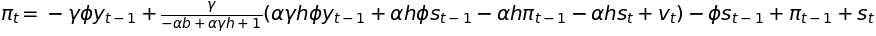

In [41]:
# Solving the model
print(f'SRAS_curve')
SRAS_curve_y = pi_minus + gamma*equal_solve_y-phi*gamma*y_minus+s_t-phi*s_minus
display(sm.Eq(pi_t,SRAS_curve_y))

Both $y_t$ and $\pi_t$ are now only given by the parameters and variables stated in the question.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Answer 2.2:**  

We now set the variables to 0 and calculate the equlibrium values for the output gap and inflation gap.

In [42]:
# y
y_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),equal_solve_y)
print(y_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],0,0,0,0,0.1))

# pi
pi_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),SRAS_curve_y)
print(pi_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],0,0,0,0,0.1))


-0.060096153846153855
-0.004507211538461539


**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [ ]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [ ]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [ ]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?